In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import svm
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score, make_scorer, f1_score, accuracy_score

In [2]:
Genotype_between_phenotype = pd.read_csv("~/Downloads/MGX_VS_MTX_mp4.csv")

In [3]:
Genotype_between_phenotype.shape

(742, 584)

In [4]:
Genotype_between_phenotype.set_index('Unnamed: 0', inplace=True)

In [5]:
select_sampels_MTX = pd.read_csv('~/Desktop/selected_samples_MTX.csv')
select_sampels_MTX = select_sampels_MTX.set_index('External ID')
select_sampels_MTX.drop("Participant ID", inplace=True, axis=1)
select_sampels_MTX

,fecalcal_max,Diagnosis
External ID,,
CSM67UA2,37.17836,CD
CSM5MCVN,16.32450,CD
CSM67UBZ,12.70000,UC
CSM5MCXL,70.91411,UC
CSM5MCY8,232.60620,UC
...,...,...
PSM7J19F,263.01820,CD
PSM7J19N,13.47861,nonIBD
PSM7J17X,16.97915,nonIBD


In [6]:
mp = Genotype_between_phenotype.loc[select_sampels_MTX.index,:]
# mp["diagnosis"] = select_sampels_MTX.iloc[:,-1]
mp

,s__Acidaminococcaceae_unclassified_SGB5785,s__Acidaminococcus_intestini,s__Actinomyces_urogenitalis,s__Adlercreutzia_equolifaciens,s__Agathobaculum_butyriciproducens,s__Aggregatibacter_segnis,s__Akkermansia_muciniphila,s__Akkermansia_sp_BIOML_A40,s__Akkermansia_sp_KLE1605,s__Alistipes_communis,...,s__Varibaculum_SGB15480,s__Veillonella_atypica,s__Veillonella_dispar,s__Veillonella_parvula,s__Veillonella_ratti,s__Veillonella_rogosae,s__Veillonella_seminalis,s__Victivallales_bacterium,s__Victivallis_vadensis,Diagnosis
External ID,,,,,,,,,,,,,,,,,,,,,
CSM67UA2,0.187061,0.577893,4.143272,88.133097,20.199513,0.000000,1.348396,109.219713,2.324021,12.239894,...,6.084665,1.786096,0.088867,0.142476,0.000000,8.449032,0.002912,0.306410,29.184211,CD
CSM5MCVN,0.278514,0.665641,4.143272,14.902626,171.918519,0.000000,12.637706,109.219713,1.012359,3.766273,...,2.041022,6.047215,0.436526,0.889377,0.557380,7.483429,0.032308,39.736777,9.610458,CD
CSM67UBZ,0.175623,1.621073,0.000000,0.000000,40.306569,0.229356,0.397728,0.000000,0.000000,49.122524,...,0.000000,0.820858,158.045455,0.000000,0.464729,0.000000,0.000000,0.000000,0.000000,UC
CSM5MCXL,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.540965,0.000000,0.000000,2.209756,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,UC
CSM5MCY8,0.175623,0.482534,0.000000,0.000000,0.553275,0.064041,198.752047,0.000000,0.000000,214.252064,...,0.000000,1.580211,0.464809,0.000000,0.113532,0.000000,0.000000,0.000000,0.000000,UC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PSM7J19F,0.249238,0.056828,4.143272,0.000000,1.796421,0.000000,3.046012,0.000000,0.858348,1.561954,...,0.350389,0.000000,15.704629,1.479167,0.000000,0.000000,0.239410,3.561779,1.688832,CD
PSM7J19N,0.000000,0.055100,0.000000,13.941638,0.321368,0.000000,0.585376,0.000000,1.421561,0.626916,...,0.000000,0.000000,33.978684,0.000000,0.000000,0.000000,0.000000,0.000000,3.299574,Control
PSM7J17X,0.000000,0.164802,0.000000,21.198675,0.321183,0.000000,207.424819,0.000000,0.001125,3.914578,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.384762,Control


In [16]:
features = mp.iloc[:,1:582]
targets = mp.iloc[:,-1]

MTX_X = features
MTX_y = targets

#fill NA's
MTX_X.fillna(MTX_X.median(), inplace=True)
MTX_X = StandardScaler().fit_transform(MTX_X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(MTX_X, MTX_y, test_size=0.30, random_state=43)


Best Model:
RandomForestClassifier(max_features=2, min_samples_split=5, n_estimators=25,
                       random_state=43)


<AxesSubplot:>

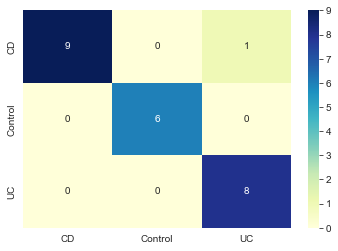

In [17]:
n_estimators_RF = [5, 10, 25, 50, 100]
max_features_RF = [2,4,8,16,32,None]
parameters_RF = {'n_estimators': n_estimators_RF,
                'max_features': max_features_RF}

RF_model = RandomForestClassifier(max_depth=None,
                                  min_samples_split=5, random_state=43)
RF_clf = GridSearchCV(RF_model, parameters_RF, cv=5, scoring= 'accuracy') #completeness_score')

RF_clf.fit(X_train, y_train)

print("Best Model:")
RF_model = RF_clf.best_estimator_
print(RF_model)

RF_predictions = RF_model.predict(X_test)

# creating a confusion matrix
labels = np.unique(y_test)
cm_RF = confusion_matrix(y_test, RF_predictions,labels=labels)
cm_RF = pd.DataFrame(cm_RF, index=labels, columns=labels)
sns.heatmap(cm_RF, cmap="YlGnBu", annot=True)

In [18]:
from sklearn import metrics
print(f'Accuracy {round(metrics.accuracy_score(y_test, RF_predictions)*100,2)}%')

Accuracy 95.83%


,,feature_importances
501,s__Phocaeicola_sartorii,0.049179
116,s__Candidatus_Heteroclostridium_caecigallinarum,0.040073
24,s__Anaerococcus_obesiensis,0.026635
383,s__GGB9615_SGB15051,0.024163
139,s__Clostridia_unclassified_SGB6376,0.021699


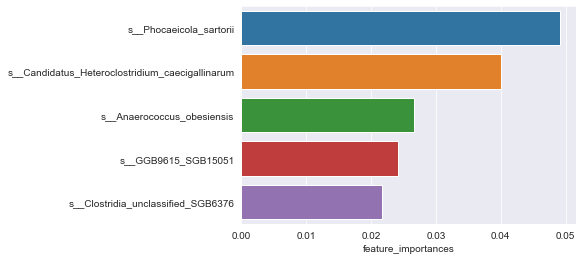

In [20]:
imp_df = pd.DataFrame({
    "": features.columns,
    "feature_importances": RF_clf.best_estimator_.feature_importances_
})
feature_importances_top_5 = imp_df.sort_values(by="feature_importances", ascending=False).head(5)
# feature_importances = imp_df.sort_values(by="feature_importances", ascending=False).to_csv('~/Desktop/feature_importances_after_normalization.csv')
display(feature_importances_top_5)
sns.barplot(x='feature_importances', y= "", data= feature_importances_top_5)
plt.show()
feature_importances_top_5 = feature_importances_top_5.T
feature_importances_top_5.columns = feature_importances_top_5.iloc[0]
feature_importances_top_5 = feature_importances_top_5[1:1]
